# Comparacion y ajuste de modelos regresión

Vamos a comparar, sobre un mismo dataset, algunos modelos de regresión:

- **Regresión Lineal**
- **Regresión Polinómica** (PolynomialFeatures + LinearRegression)
- **Ridge Regression** (Ridge - L2), es una variante de la regresión lineal que incluye una penalización para reducir el impacto de coeficientes demasiado grandes, ayudando a mitigar el sobreajuste.

  Ridge utiliza un pámetro α, que aplica de esta forma:
  - Cuando α = 0: no hay regularización, equivalente a una regresión lineal normal.
  - Cuando α aumenta: Los coeficientes se reducen proporcionalmente, pero nunca llegan exactamente a cero.
  - Un α muy grande: Todos los coeficientes se acercan a cero, pudiendo causar underfitting.

- **Lasso Regression** (Lasso - L1), es otra variante de la regresión lineal que, además de reducir el sobreajuste, también realiza selección de características al forzar algunos coeficientes a ser exactamente cero. Este tipo de regresión se elije cuando tenemos muchas variables y queremos hacer selección automática de características, cuando sospechamos que algunas variables son irrelevantes o para obtener modelos más interpretables, con menos variables.

  Al igual que con Ridge, se utiliza un parámetro α que aplica así:

  - Cuando α = 0: No hay regularización, igual que Ridge.
  - Cuando α aumenta: Los coeficientes se reducen y algunos llegan exactamente a cero.
  - Un α muy grande: Más coeficientes se vuelven cero, realizando selección de características.



Al final del cuaderno, se proponen ejercicios para que puedas experimentar con diferentes modelos y métricas. Respóndelos y haz la entrega en la actividad de Moodle.

## Importación de librerías


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.pipeline import Pipeline

## Carga de datos y preprocesamiento

In [2]:
# Cargar el dataset de California Housing
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['PRICE'] = data.target * 100  # Convertimos a miles de dólares para facilitar la interpretación

# Selección de características y variable objetivo
selected_features = ['MedInc', 'AveRooms', 'HouseAge']
X = df[selected_features]
y = df['PRICE']

## División y escalado de datos

In [ ]:
# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de características (IMPORTANTE: se ajusta con los datos de entrenamiento y se aplica a los de test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelos de regresión

Declaración de distintos modelos de regresión.

Se utiliza Pipeline para la regresión polinómica.

In [ ]:
models = {
    "Regresión Lineal": LinearRegression(),
    "Regresión Polinómica (grado 2)": Pipeline([
        ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
        ('linear', LinearRegression())
    ]),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}


## Entrenamiento y evaluación


Evaluación de Modelos:
                                        MSE       RMSE        R2
Regresión Lineal                6589.108649  81.173325  0.497172
Regresión Polinómica (grado 2)  6420.081797  80.125413  0.510070
Ridge Regression                6589.087758  81.173196  0.497173
Lasso Regression                6588.498393  81.169566  0.497218


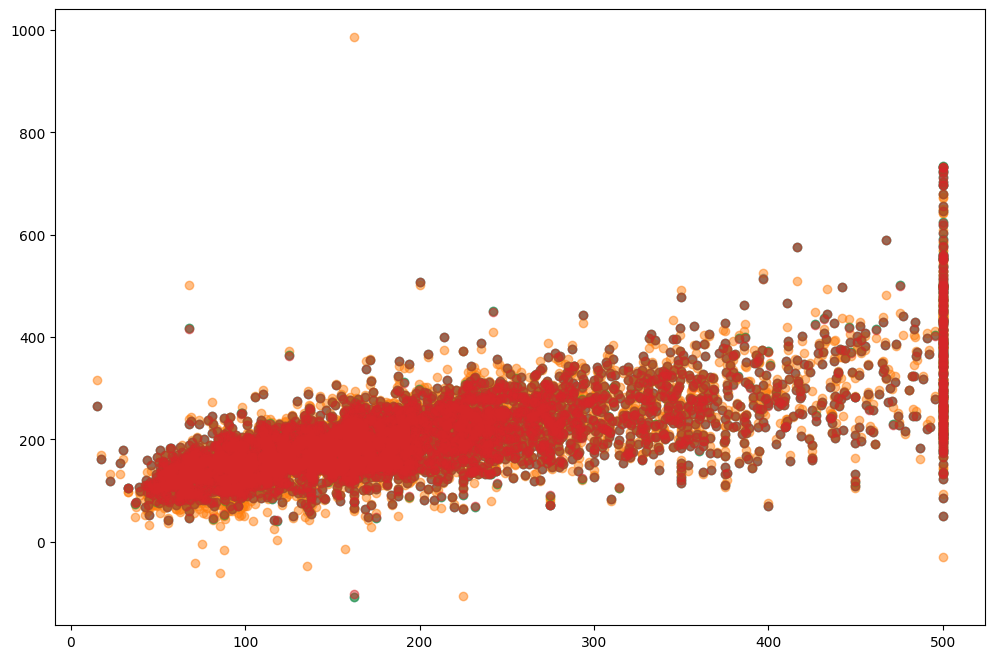

In [ ]:
evaluation_results = {}
plt.figure(figsize=(12, 8)) # Ajustamos el tamaño para que las etiquetas se vean mejor
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    evaluation_results[name] = {"MSE": mse, "RMSE": rmse, "R2": r2}

    # Visualización de predicciones DENTRO del bucle para tener una leyenda por gráfico
    plt.scatter(y_test, y_pred, alpha=0.5, label=name)

eval_df = pd.DataFrame(evaluation_results).T
print("\nEvaluación de Modelos:")
print(eval_df)

## Presentación de resultados

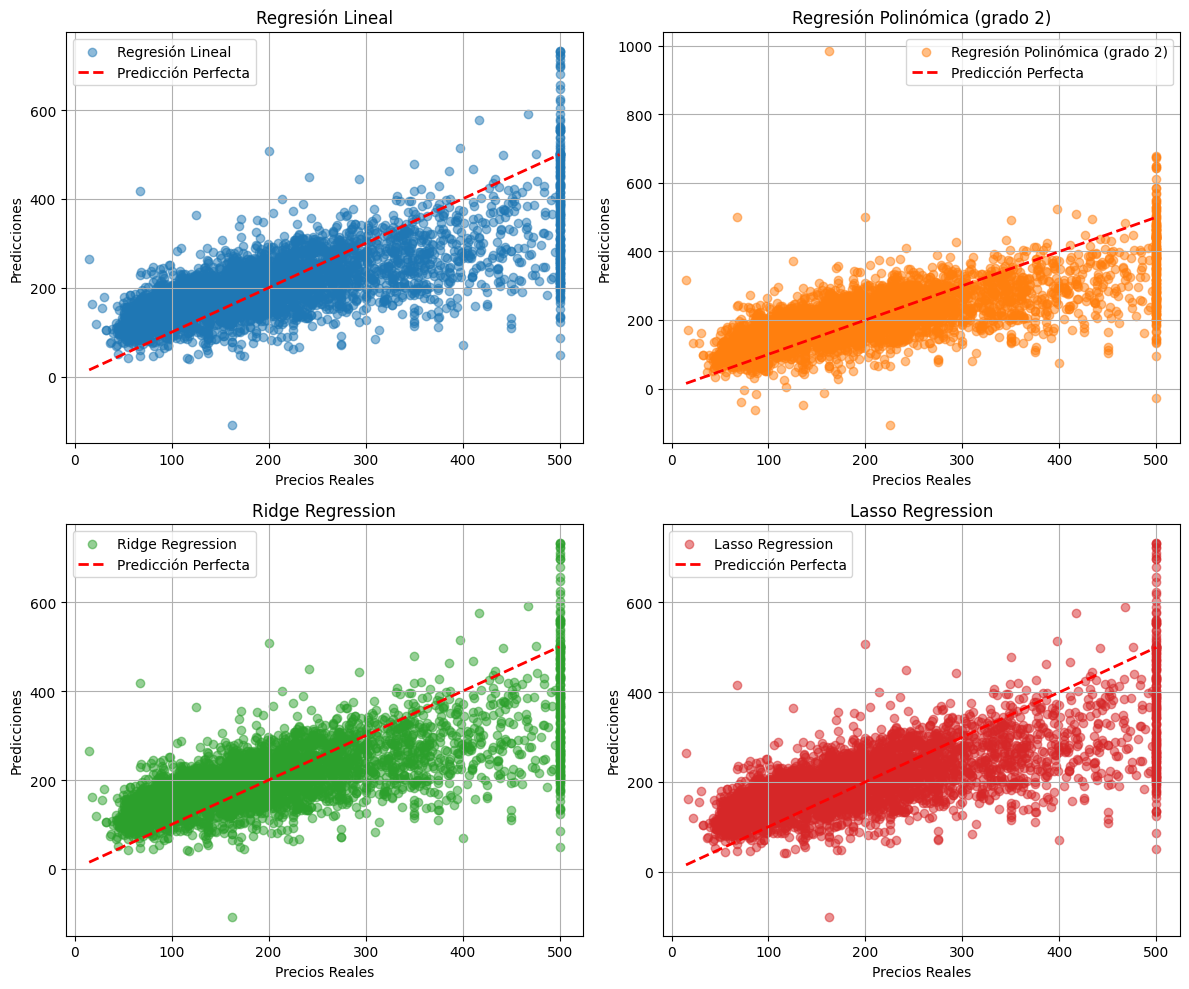

In [ ]:
# Crear la figura con 2 filas y 2 columnas de subgráficos
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Convertimos los ejes en una lista para iterar fácilmente
axes = axes.flatten()

# Hacemos la gráfica de cada modelo en su respectivo subplot
for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test_scaled)
    ax = axes[i]  # Seleccionamos el subplot correspondiente

    ax.scatter(y_test, y_pred, alpha=0.5, label=f'{name}', color=sns.color_palette("tab10")[i])
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Predicción Perfecta")

    # Configuración del subplot
    ax.set_xlabel("Precios Reales")
    ax.set_ylabel("Predicciones")
    ax.set_title(name)
    ax.legend()
    ax.grid(True)

# Ajustamos el espacio entre gráficos para evitar sobreposiciones
plt.tight_layout()
plt.show()

## Actividades

1. Prueba una transformación polinómica de grado 3. Haz la gráfica del modelo de la misma forma que las anteriores ¿Mejora el ajuste?
2. Experimenta con diferentes subconjuntos de características. ¿Cuáles son más relevantes?